# EOA Feature Extraction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
#constants
invalid_data_path = '../data/invalid/invalid.csv'
json_dump_file_invalid = 'invalid_transactions.json'
verified_open_source_license_data_path = '../data/valid/export-verified-contractaddress-opensource-license.csv'
valid_data_path = '../data/valid/valid.csv'
verified_data_path = '../data/valid/verified-audited.csv'
api_key = '8BPTQD7WQ9NK9IVRZHQEDIQMX4C6MDBQ3C'

## Data Visualization

Total number of felonious accounts in the dataset:  6297


<AxesSubplot:title={'center':'Felonious Ethereum Accounts data'}>

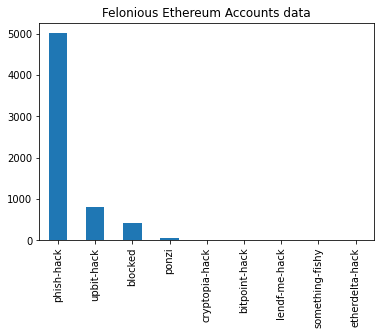

In [3]:
df = pd.read_csv(invalid_data_path)
print("Total number of felonious accounts in the dataset: ",df.shape[0])
plt.title("Felonious Ethereum Accounts data")
df['label'].value_counts().plot(kind='bar')

In [4]:
import json
 
def init_json(filename):
    # Initial Data to be written
    dictionary ={"transactions": []}
    # Serializing json 
    json_object = json.dumps(dictionary, indent = 4)
    with open(filename, "w") as outfile:
        json.dump(dictionary, outfile)

def write_json(new_data, filename):
    
    with open(filename,'r+') as file:
          # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["transactions"].append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent = 4)

In [5]:
# Fetching the tranasctions for invalid_data_path, we do this in batches of 200-500 to avoid time out

import json

df = pd.read_csv(invalid_data_path)

In [6]:
import statistics
import datetime
    
class EOA:
    def __init__(self,eoa_address,transactions):
        self.eoa_address = eoa_address.lower()
        self.transactions = transactions

    def f1_total_transactions_sent(self):
        return len([x for x in self.transactions if x['from'] == self.eoa_address])

    def f2_total_transactions_received(self):
        return len([x for x in self.transactions if x['to'] == self.eoa_address])

    def f3_value_out(self):
        return sum([int(x['value']) for x in self.transactions if x['from'] == self.eoa_address])
    
    def f4_value_in(self):
        return sum([int(x['value']) for x in self.transactions if x['to'] == self.eoa_address])
    
    def f5_value_difference(self):
        return abs(self.f3_value_out()-self.f4_value_in())
    
    def f6_number_of_distinct_address_contacted(self):
        seen = set()
        dupes = []
        for x in self.transactions:
            if (x['from'] == self.eoa_address and  x['to'] in seen) :
                dupes.append(x['to'])
            else:
                seen.add(x['to'])
            if (x['to'] == self.eoa_address and  x['from'] in seen) :
                dupes.append(x['from'])
            else:
                seen.add(x['from'])  
        return len(seen)-1
    
    def f7_total_transactions_sent_received(self):
        return self.f1_total_transactions_sent() + self.f2_total_transactions_received()
    
    def f8_total_transactions_sent_to_unique_address(self):
        all_transactions_sent = [x for x in self.transactions if x['from'] == self.eoa_address]
        seen = set()
        dupes = []
        for x in all_transactions_sent:
            if (x['to'] in seen) :
                dupes.append(x['to'])
            else:
                seen.add(x['to'])
        return len(seen)
    
    def f9_total_transactions_received_from_unique_address(self):
        all_transactions_sent = [x for x in self.transactions if x['to'] == self.eoa_address]
        seen = set()
        dupes = []
        for x in all_transactions_sent:
            if (x['from'] in seen) :
                dupes.append(x['from'])
            else:
                seen.add(x['from'])
        return len(seen)
    
    def f10_first_transaction_time(self):
        return self.transactions[0]['timeStamp']    
    
    def f11_last_transaction_time(self):
        return self.transactions[len(self.transactions)-1]['timeStamp']

    def f12_transction_active_duration(self):
        a = datetime.datetime.fromtimestamp(int(self.f10_first_transaction_time()))
        b = datetime.datetime.fromtimestamp(int(self.f11_last_transaction_time()))
        return (b-a).total_seconds()
    
    def f13_last_txn_bit(self):
        return self.transactions[len(self.transactions)-1]['txreceipt_status']    

    def f14_last_transaction_value(self):
        return self.transactions[len(self.transactions)-1]['value']

    def f15_average_incoming_ether(self):
        try:
            all_incoming_transactions = [x for x in self.transactions if x['to'] == self.eoa_address]
            return self.f4_value_in()/len(all_incoming_transactions)
        except:
            return 0
    
    def f16_average_outgoing_ether(self):
        try:
            all_outgoing_transactions = [x for x in self.transactions if x['from'] == self.eoa_address]
            return self.f3_value_out()/len(all_outgoing_transactions)
        except:
            return 0

    def f17_average_percentage_gas_incoming(self):
        total_incoming_gas = sum([int(x['gas']) for x in self.transactions if x['to'] == self.eoa_address])
        total_gas = sum([int(x['gas']) for x in self.transactions])
        return (total_incoming_gas/total_gas)*100

    def f18_average_percentage_gas_outgoing(self):
        total_outgoing_gas = sum([int(x['gas']) for x in self.transactions if x['from'] == self.eoa_address])
        total_gas = sum([int(x['gas']) for x in self.transactions])
        return (total_outgoing_gas/total_gas)*100
    
    def f19_outgoing_gas_price(self):
        return sum([int(x['gasPrice']) for x in self.transactions if x['from'] == self.eoa_address])

    def f20_incoming_gas_price(self):
        return sum([int(x['gasPrice']) for x in self.transactions if x['to'] == self.eoa_address])
# check
    def f21_average_incoming_gas_price(self):
        try:
            all_incoming_transactions = [x for x in self.transactions if x['to'] == self.eoa_address]
            return self.f20_incoming_gas_price()/len(all_incoming_transactions)
        except:
            return 0
# check    
    def f22_average_outgoing_gas_price(self):
        try:
            all_outgoing_transactions = [x for x in self.transactions if x['from'] == self.eoa_address]
            return self.f19_outgoing_gas_price()/len(all_outgoing_transactions)
        except:
            return 0
    
    def f23_total_failed_transactions_incoming(self):
        return len([x for x in self.transactions if x['txreceipt_status'] == '0' and x['to'] == self.eoa_address])
    
    def f24_total_failed_transactions_outgoing(self):
        return len([x for x in self.transactions if x['txreceipt_status'] == '0' and x['from'] == self.eoa_address])

    def f25_total_failed_transactions(self):
        return len([x for x in self.transactions if x['txreceipt_status'] == '0'])
    
    def f26_total_success_transactions_incoming(self):
        return len([x for x in self.transactions if x['txreceipt_status'] == '1' and x['to'] == self.eoa_address])
    
    def f27_total_success_transactions_outgoing(self):
        return len([x for x in self.transactions if x['txreceipt_status'] == '1' and x['from'] == self.eoa_address])
    
    def f28_total_success_transactions(self):
        return len([x for x in self.transactions if x['txreceipt_status'] == '1'])
    
    def f29_gas_used_incoming_transaction(self):
        return sum([int(x['gasUsed']) for x in self.transactions if x['to'] == self.eoa_address])
    
    def f30_gas_used_outgoing_transaction(self):
        return sum([int(x['gasUsed']) for x in self.transactions if x['from'] == self.eoa_address])
    
    def f31_percentage_transaction_sent(self):
        return ((self.f1_total_transactions_sent())/(self.f1_total_transactions_sent()+self.f2_total_transactions_received())*100)
    
    def f32_percentage_transaction_received(self):
        return ((self.f2_total_transactions_received())/(self.f1_total_transactions_sent()+self.f2_total_transactions_received())*100)
    
    def f33_standard_deviation_ether_incoming(self):
        try:
            return statistics.stdev([int(x['value']) for x in self.transactions if x['to'] == self.eoa_address]) 
        except:
            return 0
    
    def f34_standard_deviation_ether_outgoing(self):
        try:
            return statistics.stdev([int(x['value']) for x in self.transactions if x['from'] == self.eoa_address]) 
        except:
            return 0

#   check
    def f35_standard_deviation_gas_price_incoming(self):
        try:
            return statistics.stdev([int(x['gasPrice']) for x in self.transactions if x['to'] == self.eoa_address]) 
        except:
            return 0

#   check
    def f36_standard_deviation_gas_price_outgoing(self):
        try:
            return statistics.stdev([int(x['gasPrice']) for x in self.transactions if x['from'] == self.eoa_address]) 
        except:
            return 0
        
    def f37_first_transaction_bit(self):
        return self.transactions[0]['txreceipt_status']
    
    def f38_first_transaction_value(self):
        return self.transactions[0]['value']
    
    def f39_mean_in_time(self):
        times = []
        all_time = [x['timeStamp'] for x in self.transactions if x['to'] == self.eoa_address]
        for index,value in enumerate(all_time):
            if(index + 1 < len(all_time)):
                a = datetime.datetime.fromtimestamp(int(all_time[index]))
                b = datetime.datetime.fromtimestamp(int(all_time[index + 1]))
                times.append((b-a).total_seconds()) 
        if(len(times) == 0):
            return 0
        else:
            return statistics.mean(times)
        
    def f40_mean_out_time(self):
        times = []
        all_time = [x['timeStamp'] for x in self.transactions if x['from'] == self.eoa_address]
        for index,value in enumerate(all_time):
            if(index + 1 < len(all_time)):
                a = datetime.datetime.fromtimestamp(int(all_time[index]))
                b = datetime.datetime.fromtimestamp(int(all_time[index + 1]))
                times.append((b-a).total_seconds()) 
        if(len(times) == 0):
            return 0
        else:
            return statistics.mean(times)
        
    def f41_mean_time(self):
        times = []
        all_time = [x['timeStamp'] for x in self.transactions]
        for index,value in enumerate(all_time):
            if(index + 1 < len(all_time)):
                a = datetime.datetime.fromtimestamp(int(all_time[index]))
                b = datetime.datetime.fromtimestamp(int(all_time[index + 1]))
                times.append((b-a).total_seconds()) 
        if(len(times) == 0):
            return 0
        else:
            return statistics.mean(times)
        
    def f42_transaction_fee_spent_incoming(self):
        return sum([int(x['gas']) for x in self.transactions if x['to'] == self.eoa_address])
    
    def f43_transaction_fee_spent_outgoing(self):
        return sum([int(x['gas']) for x in self.transactions if x['from'] == self.eoa_address])
    
    def f44_transaction_fee_spent(self):
        return sum([int(x['gas']) for x in self.transactions])

In [7]:
%%time
for ind in df.index:
    if(ind>=0 and ind <100):
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            print(data["address"] + " is a EOA")
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
        

0xbceaa0040764009fdcff407e82ad1f06465fd2c4 is a EOA
0x03b70dc31abf9cf6c1cf80bfeeb322e8d3dbb4ca is a EOA
0xeda5066780de29d00dfb54581a707ef6f52d8113 is a EOA
0xf6884686a999f5ae6c1af03db92bab9c6d7dc8de is a EOA
0x079667f4f7a0b440ad35ebd780efd216751f0758 is a EOA
0x5a59fc20e2659f9df6a21ccd8627ea0d2403b36b is a EOA
0xa7f72bf63edeca25636f0b13ec5135296ca2ebb2 is a EOA
0x9431eea5981c9f94e19d43f523b9589269215ab3 is a EOA
0x944a3f5641d6faf7a6abde4ec31e40d0929955ed is a EOA
0x8f95d25bd5ec1973b8cbcd9572a7287f03420ca7 is a EOA
0x29d7d1dd5b6f9c864d9db560d72a247c178ae86b is a EOA
0x0c9d1b3ca852c67bbeabeeb51e9482a845d56868 is a EOA
0x4073aa0f9885bbe59895a27158bbe865052678b8 is a EOA
0xd8ddfd63696127b18911546b13856cf98a246ff4 is a EOA
0xfbf6f29c126382cf15795bb209ee506a174cc709 is a EOA
0x4182d887fb4fba8cd49e9f50908c13c761080ec5 is a EOA
0x905475cbca398e8fee6e35bcb2f530a3474b78ce is a EOA
0xce52d38539e1e557f184f1073a59f69c9ba95f28 is a EOA
0xdb82af76f9ccddfe9e8f7996492f4c5bd5f9d53d is a EOA
0x122c7f492c

In [8]:
%%time
for ind in df.index:
    if(ind>=100 and ind <200):
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            print(data["address"] + " is a EOA")
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
        

0xdb53ce480bac3ce96fdb79fae1156f80b6925e05 is a EOA
0xded605e5a25d7e6808d726a52257ac5e65b99475 is a EOA
0xf261B3A60Ef40eE0B369B0705c1a2c58B02799DF is a EOA
0x179b553f677766183e7cd2ae8c148ace69db7cdd is a EOA
0xa0d4BEE1BeEaFce031C56CfB40210746Cc6Ab2D0 is a EOA
0x9B76AD3435E2cBd4e08FEeA210a9972465a4748C is a EOA
0x7098c7113c2ecaf48baad07e598c74c2689a5795 is a EOA
0xC42bFd4F93b46037888602c3e7E6E57d65E87E73 is a EOA
0x84106febe96b45d1a6cf1dceec8285c46faf25de is a EOA
0x0C4762Bc7B1Af1DC9448A827f53861c118B712dE is a EOA
0xc1f9c01602043fcef642cc8601bda13ca29b7a9c is a EOA
0x83940770976605dda722a620dd9d91825c8d65dc is a EOA
0xca8e988ffb5a662f8201c90b6a45cc7826f5f15a is a EOA
0x7942ec88b93ac9227957a118d8d09aa736c886a1 is a EOA
0x762ad6be3f56a132f99cc0cd6ba4c84d1e992824 is a EOA
0xd6572692BE52881905Dd59d4984cC7E61A2514e7 is a EOA
0x9826D8246E0c38cd3EC3f8b6D733be6001c2c712 is a EOA
0x3a1ba1e4510d36272d1e1d708787Befa1780b778 is a EOA
0x52beed3924b0824411d03ea2fe51e429717dcf10 is a EOA
0x7ed44f8b30

In [9]:
%%time
for ind in df.index:
    if(ind>=200 and ind <500):
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            print(data["address"] + " is a EOA")
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
        

0x52bef206e8e0403cd60d37e48f4f3860d9545556 is a EOA
0x6d1ca9ee33f0806bd37a8ac4c418a0ecb0c9f086 is a EOA
0x018f2f4b3c9e38607aa7ab4dea23e9d663e3e050 is a EOA
0xf7355cb5278fc4be2f53ce373f7cd9b543d042a1 is a EOA
0x38b9dafe93f0b3ab7d35ac42165b73c0f3c5fd8c is a EOA
0x634cdd7ebeccccf517cd8f4eca959474bc1b58cc is a EOA
0xb5eb9d18c0413535baf1fa8bd8bf8f6ea7fea47a is a EOA
0xe3224fa0197de258ba065c35380d7dfd2396ec89 is a EOA
0x91459992bcbf089851abffa033559c2eef120469 is a EOA
0xd787e430cf92d42fa28b7643e41ea1d871a19fff is a EOA
0xbaf18322ce288b08b2c58081fd0d1a9f03a9ea37 is a EOA
0xc4b1a260735fdc817409183db8594baf9f0b0f2f is a EOA
0x88bdeb65ed500794118d0e5fdf5808d23bb74e73 is a EOA
0x9a4afeaecd8efe2a7186365b55e72503d555713b is a EOA
0xaa6a6d930fdc6f32ffc38db4ea6c4668dd10c15b is a EOA
0xf76dea0a7ed40e379cc834cf94a6bdc59ac11044 is a EOA
0xedc0c49946b93aa296a11298480ae7913bb65222 is a EOA
0x754a7657092fd2862338ff06ce02cfc389d49e21 is a EOA
0x08986f5cecd3cb8882e4a34a16961e3124377291 is a EOA
0x64c940690a

In [10]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=500 and ind <1000):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

TypeError: can only concatenate str (not "int") to str

In [11]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=1000 and ind <1020):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 18 EOA, out of 20
CPU times: user 1.22 s, sys: 52.4 ms, total: 1.27 s
Wall time: 17.2 s


In [12]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=1020 and ind <1500):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 320 EOA, out of 480
CPU times: user 20.8 s, sys: 804 ms, total: 21.6 s
Wall time: 5min 16s


In [13]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=1500 and ind <2000):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 358 EOA, out of 500
CPU times: user 23.4 s, sys: 783 ms, total: 24.2 s
Wall time: 4min 37s


In [14]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=2000 and ind <2500):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 391 EOA, out of 500
CPU times: user 28.8 s, sys: 824 ms, total: 29.6 s
Wall time: 5min 22s


In [15]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=2500 and ind <3000):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 408 EOA, out of 500
CPU times: user 55.8 s, sys: 1.78 s, total: 57.5 s
Wall time: 5min 53s


In [16]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=3000 and ind <3500):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 391 EOA, out of 500
CPU times: user 57.3 s, sys: 1.95 s, total: 59.3 s
Wall time: 6min 11s


In [17]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=3500 and ind <4000):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 407 EOA, out of 500
CPU times: user 56.4 s, sys: 1.86 s, total: 58.2 s
Wall time: 6min 42s


In [18]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=4000 and ind <5000):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 770 EOA, out of 1000
CPU times: user 41.4 s, sys: 1.1 s, total: 42.5 s
Wall time: 11min 49s


In [24]:
df.shape[0]

6297

In [26]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=5001 and ind <5010):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 3 EOA, out of 9
CPU times: user 328 ms, sys: 16 ms, total: 344 ms
Wall time: 5.97 s


In [41]:
df = pd.read_csv(invalid_data_path)

In [42]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=5016 and ind <5200):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 183 EOA, out of 184
CPU times: user 13.1 s, sys: 341 ms, total: 13.4 s
Wall time: 2min 10s


In [44]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=5200 and ind <5300):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 100 EOA, out of 100
CPU times: user 5.25 s, sys: 154 ms, total: 5.41 s
Wall time: 1min 2s


In [45]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=5300 and ind <5400):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 100 EOA, out of 100
CPU times: user 4.94 s, sys: 75.5 ms, total: 5.01 s
Wall time: 1min 5s


In [46]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=5300 and ind <5400):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 100 EOA, out of 100
CPU times: user 5.62 s, sys: 164 ms, total: 5.78 s
Wall time: 1min 2s


In [48]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=5410 and ind <5450):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 40 EOA, out of 40
CPU times: user 1.94 s, sys: 37.8 ms, total: 1.98 s
Wall time: 26.8 s


In [49]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=5450 and ind <5500):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 50 EOA, out of 50
CPU times: user 2.39 s, sys: 45.4 ms, total: 2.44 s
Wall time: 30.6 s


In [50]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=5500 and ind <5700):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 200 EOA, out of 200
CPU times: user 9.85 s, sys: 347 ms, total: 10.2 s
Wall time: 1min 58s


In [52]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=5700 and ind <5800):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 100 EOA, out of 100
CPU times: user 4.9 s, sys: 132 ms, total: 5.03 s
Wall time: 55.2 s


In [60]:
df['Address'][5823]

'0xb479f8342e72fbed4dcbd1714777842cb81f9e48'

In [66]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=5827 and ind <5900):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 42 EOA, out of 73
CPU times: user 7.09 s, sys: 222 ms, total: 7.31 s
Wall time: 1min 9s


In [67]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=5900 and ind <6000):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 47 EOA, out of 100
CPU times: user 5.5 s, sys: 204 ms, total: 5.7 s
Wall time: 1min 5s


In [69]:
%%time
total = 0
eoa_count = 0
for ind in df.index:
    if(ind>=6200 and ind <6300):
        total+=1
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        if len(data['result'])!=0 and data["result"][0]["input"] == "0x" and data["result"][0]["contractAddress"] == "" :
            eoa_count+=1
            tx = data['result']
            eoa = EOA(addr,tx)
            eoa_df = pd.DataFrame(
                columns=[
                    "f1_total_transactions_sent",
                    "f2_total_transactions_received",
                    "f3_value_out",
                    "f4_value_in",
                    "f5_value_difference",
                    "f6_number_of_distinct_address_contacted",
                    "f7_total_transactions_sent_received",
                    "f8_total_transactions_sent_to_unique_address",
                    "f9_total_transactions_received_from_unique_address",
                    "f10_first_transaction_time",
                    "f11_last_transaction_time",
                    "f12_transction_active_duration",
                    "f13_last_txn_bit",
                    "f14_last_transaction_value",
                    "f15_average_incoming_ether",
                    "f16_average_outgoing_ether",
                    "f17_average_percentage_gas_incoming",
                    "f18_average_percentage_gas_outgoing",
                    "f19_outgoing_gas_price",
                    "f20_incoming_gas_price",
                    "f21_average_incoming_gas_price",
                    "f22_average_outgoing_gas_price",
                    "f23_total_failed_transactions_incoming",
                    "f24_total_failed_transactions_outgoing",
                    "f25_total_failed_transactions",
                    "f26_total_success_transactions_incoming",
                    "f27_total_success_transactions_outgoing",
                    "f28_total_success_transactions",
                    "f29_gas_used_incoming_transaction",
                    "f30_gas_used_outgoing_transaction",
                    "f31_percentage_transaction_sent",
                    "f32_percentage_transaction_received",
                    "f33_standard_deviation_ether_incoming",
                    "f34_standard_deviation_ether_outgoing",
                    "f35_standard_deviation_gas_price_incoming",
                    "f36_standard_deviation_gas_price_outgoing",
                    "f37_first_transaction_bit",
                    "f38_first_transaction_value",
                    "f39_mean_in_time",
                    "f40_mean_out_time",
                    "f41_mean_time",
                    "f42_transaction_fee_spent_incoming",
                    "f43_transaction_fee_spent_outgoing",
                    "f44_transaction_fee_spent"
                ]
            )            
            eoa_df = eoa_df.append(
                {
                    "f1_total_transactions_sent": eoa.f1_total_transactions_sent(),
                    "f2_total_transactions_received": eoa.f2_total_transactions_received(),
                    "f3_value_out": eoa.f3_value_out(),
                    "f4_value_in": eoa.f4_value_in(),
                    "f5_value_difference": eoa.f5_value_difference(),
                    "f6_number_of_distinct_address_contacted": eoa.f6_number_of_distinct_address_contacted(),
                    "f7_total_transactions_sent_received": eoa.f7_total_transactions_sent_received(),
                    "f8_total_transactions_sent_to_unique_address": eoa.f8_total_transactions_sent_to_unique_address(),
                    "f9_total_transactions_received_from_unique_address": eoa.f9_total_transactions_received_from_unique_address(),
                    "f10_first_transaction_time": eoa.f10_first_transaction_time(),
                    "f11_last_transaction_time": eoa.f11_last_transaction_time(),
                    "f12_transction_active_duration": eoa.f12_transction_active_duration(),
                    "f13_last_txn_bit": eoa.f13_last_txn_bit(),
                    "f14_last_transaction_value": eoa.f14_last_transaction_value(),
                    "f15_average_incoming_ether": eoa.f15_average_incoming_ether(),
                    "f16_average_outgoing_ether": eoa.f16_average_outgoing_ether(),
                    "f17_average_percentage_gas_incoming": eoa.f17_average_percentage_gas_incoming(),
                    "f18_average_percentage_gas_outgoing": eoa.f18_average_percentage_gas_outgoing(),
                    "f19_outgoing_gas_price": eoa.f19_outgoing_gas_price(),
                    "f20_incoming_gas_price": eoa.f20_incoming_gas_price(),
                    "f21_average_incoming_gas_price": eoa.f21_average_incoming_gas_price(),
                    "f22_average_outgoing_gas_price": eoa.f22_average_outgoing_gas_price(),
                    "f23_total_failed_transactions_incoming": eoa.f23_total_failed_transactions_incoming(),
                    "f24_total_failed_transactions_outgoing": eoa.f24_total_failed_transactions_outgoing(),
                    "f25_total_failed_transactions": eoa.f25_total_failed_transactions(),
                    "f26_total_success_transactions_incoming" : eoa.f26_total_success_transactions_incoming(),
                    "f27_total_success_transactions_outgoing" : eoa.f27_total_success_transactions_outgoing(),
                    "f28_total_success_transactions" : eoa.f28_total_success_transactions(),
                    "f29_gas_used_incoming_transaction" : eoa.f29_gas_used_incoming_transaction(),
                    "f30_gas_used_outgoing_transaction" : eoa.f30_gas_used_outgoing_transaction(),
                    "f31_percentage_transaction_sent" : eoa.f31_percentage_transaction_sent(),
                    "f32_percentage_transaction_received" : eoa.f32_percentage_transaction_received(),
                    "f33_standard_deviation_ether_incoming" : eoa.f33_standard_deviation_ether_incoming(),
                    "f34_standard_deviation_ether_outgoing" : eoa.f34_standard_deviation_ether_outgoing(),
                    "f35_standard_deviation_gas_price_incoming" : eoa.f35_standard_deviation_gas_price_incoming(),
                    "f36_standard_deviation_gas_price_outgoing" : eoa.f36_standard_deviation_gas_price_outgoing(),
                    "f37_first_transaction_bit" : eoa.f37_first_transaction_bit(),
                    "f38_first_transaction_value" :eoa.f38_first_transaction_value(),
                    "f39_mean_in_time" : eoa.f39_mean_in_time(),
                    "f40_mean_out_time" : eoa.f40_mean_out_time(),
                    "f41_mean_time" : eoa.f41_mean_time(),
                    "f42_transaction_fee_spent_incoming" : eoa.f42_transaction_fee_spent_incoming(),
                    "f43_transaction_fee_spent_outgoing" : eoa.f43_transaction_fee_spent_outgoing(),
                    "f44_transaction_fee_spent" : eoa.f44_transaction_fee_spent(),
                },
                ignore_index=True,
            )      
            eoa_df.to_csv('invalid_transactions_features.csv', mode='a', header=False)
print("Total of "+str(eoa_count)+ " EOA, out of "+str(total))      

Total of 2 EOA, out of 97
CPU times: user 1min 46s, sys: 3.27 s, total: 1min 49s
Wall time: 9min 15s
